# <center>Project-Based Assignment CLO-2</center>

#### Latar Belakang
Data yang digunakan dalam analisis ini terkait dengan varian anggur "Vinho Verde" Portugal, terutama anggur varietas merah dan putih. Sumber data ini berasal dari pengujian fisikokimia dan sensoris pada anggur tersebut. Data tersebut memiliki 12 variabel input yang didasarkan pada pengujian fisikokimia, dan 1 variabel output yang didasarkan pada data sensoris. Data ini dapat dianggap sebagai tugas klasifikasi atau regresi. Namun, sejumlah kelas memiliki distribusi yang tidak seimbang, dengan banyaknya anggur normal yang jauh lebih banyak daripada anggur berkualitas baik atau buruk.

  Berikut adalah variabel input (berdasarkan tes fisikokimia):
1.Kadar asam tetap
2.Kadar asam yang mudah menguap
3.Asam sitrat
4.Gula sisa
5.Klorida
6.Dioksida sulfur (belerang) bebas
7.Total dioksida sulfur (belerang)
8.Densitas
9.pH
10.Sulfat
11.Alkohol
12.Kualitas (skor antara 0 dan 10)


Dataset ini tidak mencakup data tentang jenis anggur, merk anggur, harga jual anggur, dll. karena masalah privasi dan logistik. Dataset ini dapat dilihat sebagai tugas klasifikasi atau regresi.


In [ ]:
# Import Library
import pandas as pd  # Mengimpor pustaka pandas untuk manipulasi data
import numpy as np  # Mengimpor pustaka numpy untuk operasi numerik
import seaborn as sns  # Mengimpor pustaka seaborn untuk visualisasi data statistik
from sklearn.model_selection import train_test_split  # Mengimpor fungsi train_test_split dari sklearn untuk membagi data menjadi data latih dan data uji
from sklearn.preprocessing import StandardScaler  # Mengimpor fungsi StandardScaler dari sklearn untuk penskalaan fitur
import matplotlib.pyplot as plt  # Mengimpor pustaka matplotlib untuk visualisasi data
%matplotlib inline

# Kode ini mengimpor pustaka yang diperlukan untuk manipulasi data, visualisasi, pemrosesan, dan pembagian data
# untuk melatih dan menguji model. Ini memastikan bahwa semua pustaka yang diperlukan tersedia sebelum memulai proyek.

In [ ]:
# Read in white wine data
white = pd.read_csv("/content/sample_data/winequality-white.csv", sep=';')
# Membaca data anggur putih dari file CSV ke dalam DataFrame menggunakan pandas

# Read in red wine data
red = pd.read_csv("/content/sample_data/winequality-red.csv", sep=';')
# Membaca data anggur merah dari file CSV ke dalam DataFrame menggunakan pandas

# Dua set data anggur putih dan merah dimuat dari file CSV menggunakan perpustakaan pandas untuk analisis lebih lanjut.

In [ ]:
# Exploration Data
print(white.info())
# Mencetak informasi dasar tentang DataFrame data anggur putih menggunakan metode info() dari pandas

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB
None


In [ ]:
print(red.info())
# Mencetak informasi dasar tentang DataFrame data anggur merah menggunakan metode info() dari pandas

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None


In [ ]:
white.describe()
# Menghasilkan statistik deskriptif ringkas dari data anggur putih

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [ ]:
red.describe()
# Menghasilkan statistik deskriptif ringkas dari data anggur merah

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [ ]:
white.isnull().sum()
# Mengecek NULL Values dari data anggur putih

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [ ]:
red.isnull().sum()
# Mengecek NULL Values dari data anggur merah

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

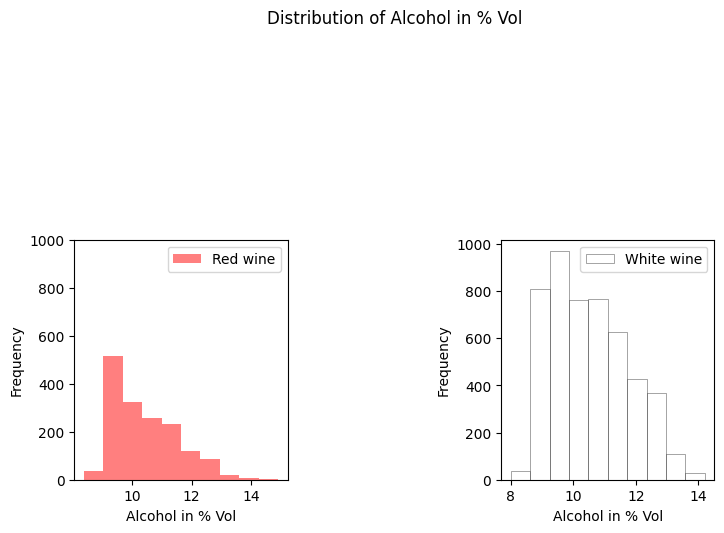

In [ ]:
# EDA
fig, ax = plt.subplots(1, 2)

ax[0].hist(red.alcohol, 10, facecolor='red', alpha=0.5, label="Red wine")  # Histogram untuk data anggur merah
ax[1].hist(white.alcohol, 10, facecolor='white', ec="black", lw=0.5, alpha=0.5, label="White wine")  # Histogram untuk data anggur putih

fig.subplots_adjust(left=0, right=1, bottom=0, top=0.5, hspace=0.05, wspace=1)  # Penyesuaian tata letak subplot
ax[0].set_ylim([0, 1000])  # Mengatur batas sumbu y pada subplot pertama
ax[0].set_xlabel("Alcohol in % Vol")  # Memberi label sumbu x pada subplot pertama
ax[0].set_ylabel("Frequency")  # Memberi label sumbu y pada subplot pertama
ax[1].set_xlabel("Alcohol in % Vol")  # Memberi label sumbu x pada subplot kedua
ax[1].set_ylabel("Frequency")  # Memberi label sumbu y pada subplot kedua
ax[0].legend(loc='best')  # Menampilkan legenda pada subplot pertama
ax[1].legend(loc='best')  # Menampilkan legenda pada subplot kedua
fig.suptitle("Distribution of Alcohol in % Vol")  # Memberi judul keseluruhan plot

plt.show()  # Menampilkan plot histogram

# Visualisasi ini memberikan gambaran tentang distribusi kadar alkohol dalam anggur merah dan putih,
# memungkinkan perbandingan antara kedua jenis anggur. Histogram digunakan untuk menunjukkan frekuensi kemunculan
# nilai-nilai tertentu dari variabel "Alcohol in % Vol" dalam kedua kelompok data.


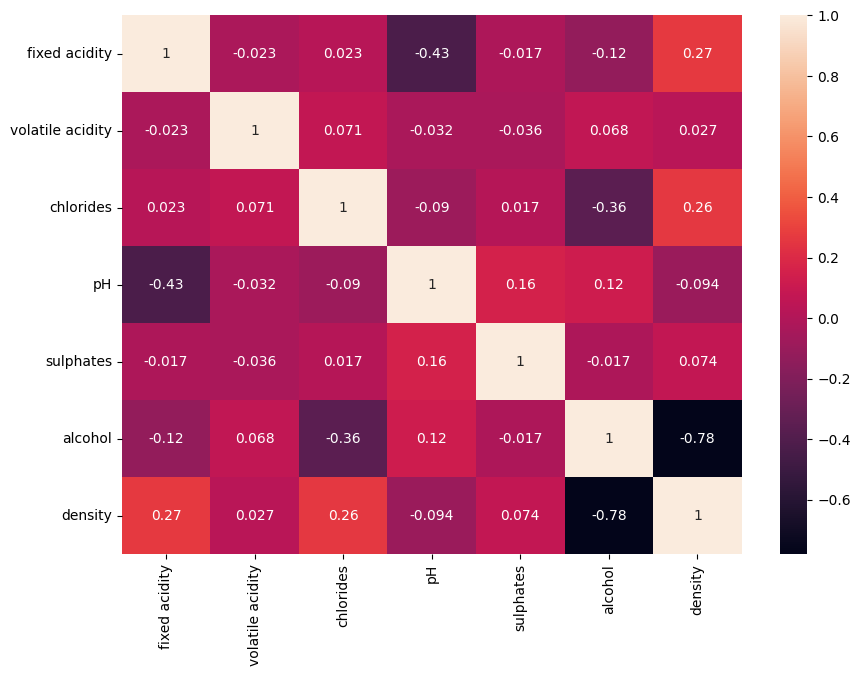

In [ ]:
# Matriks Korelasi
fig, ax = plt.subplots(figsize=(10, 7))  # Membuat subplot dengan ukuran tertentu
selected = ['fixed acidity','volatile acidity','chlorides','pH','sulphates','alcohol','density' ]
white = white[selected]
sns.heatmap(white.corr(), annot=True, ax=ax)
# Menampilkan matriks korelasi data anggur putih dengan heatmap dan penanda annotasi
plt.show()  # Menampilkan plot


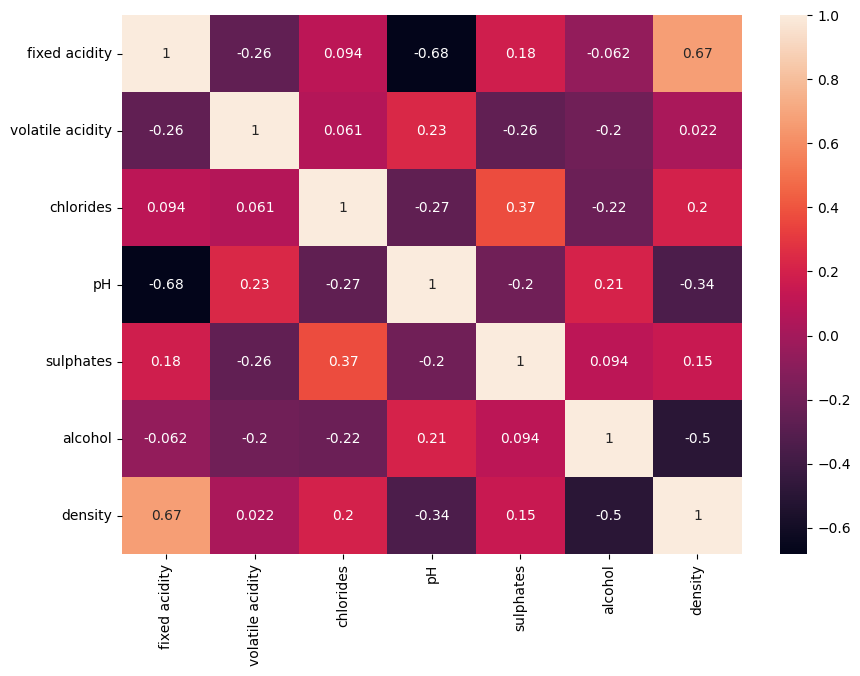

In [ ]:
# Matriks Korelasi
fig, ax = plt.subplots(figsize=(10, 7))  # Membuat subplot dengan ukuran tertentu
red = red[selected]
sns.heatmap(red.corr(), annot=True, ax=ax)
# Menampilkan matriks korelasi data anggur merah dengan heatmap dan penanda annotasi
plt.show()  # Menampilkan plot


In [ ]:
# Data Preprocessing

# Append `white` to `red`
wines = red.append(white, ignore_index=True)
# Menggabungkan DataFrame 'red' dan DataFrame 'white' menjadi satu DataFrame tunggal yang disimpan dalam variabel 'wines'
wines.tail()  # Menampilkan lima baris terakhir dari DataFrame 'wines'


<ipython-input-9-14038b15bc28>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  wines = red.append(white, ignore_index=True)


,fixed acidity,volatile acidity,chlorides,pH,sulphates,alcohol,density
6492,6.2,0.21,0.039,3.27,0.50,11.2,0.99114
6493,6.6,0.32,0.047,3.15,0.46,9.6,0.99490
6494,6.5,0.24,0.041,2.99,0.46,9.4,0.99254
6495,5.5,0.29,0.022,3.34,0.38,12.8,0.98869
6496,6.0,0.21,0.020,3.26,0.32,11.8,0.98941


In [ ]:
# Specify the data
X = wines.iloc[:, 0:6]  # Menentukan variabel independen X dari data yang telah diproses sebelumnya

# Specify the target labels and flatten the array
y = np.ravel(wines.density)  # Menentukan label target y dari data yang telah diproses sebelumnya

# Split the data up in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
# Membagi data menjadi data latih dan data uji dengan proporsi 70:30 dan pengaturan seed acak 42

# Langkah-langkah ini bertujuan untuk mempersiapkan data untuk proses pelatihan dan pengujian model.
# Variabel independen (X) berisi fitur-fitur dari data, sementara label target (y) adalah
# variabel yang akan diprediksi oleh model. Data kemudian dibagi menjadi set latih dan uji untuk proses evaluasi model.


In [ ]:
y_test[0:10]
# Data yang ditampilkan adalah 10 label target pertama dari data uji setelah proses pemisahan data.
# Nilai-nilai ini mewakili klasifikasi untuk setiap sampel dalam data uji,
# di mana nilai 0 menunjukkan anggur putih dan nilai 1 menunjukkan anggur merah.

array([0.9942 , 0.9956 , 0.99212, 0.99592, 0.99888, 0.99323, 0.999  ,
       0.99454, 0.9978 , 0.99121])

In [ ]:
# Define the scaler
scaler = StandardScaler().fit(X_train)
# Menentukan scaler menggunakan StandardScaler dari scikit-learn berdasarkan data pelatihan

# Scale the train set
X_train = scaler.transform(X_train)  # Menskalakan data pelatihan

# Scale the test set
X_test = scaler.transform(X_test)  # Menskalakan data uji

# Langkah-langkah ini bertujuan untuk memastikan bahwa semua fitur memiliki skala yang serupa,
# sehingga model pembelajaran mesin dapat belajar dari data yang setara.
# Skala yang sama diterapkan pada data pelatihan dan data uji untuk menjaga konsistensi dalam pemrosesan data.

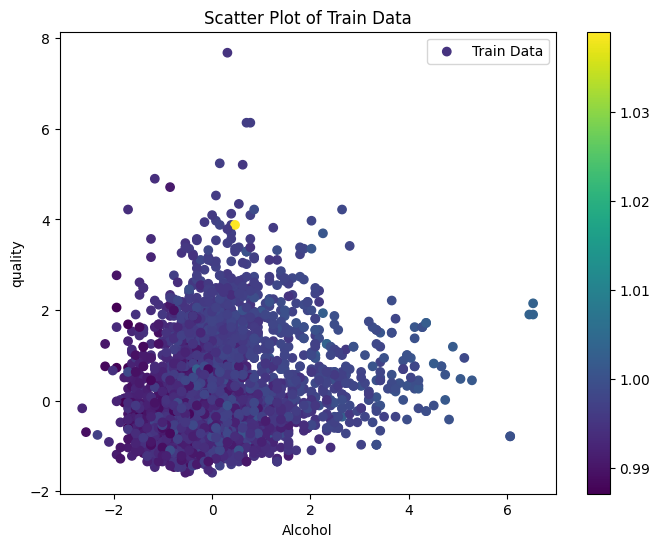

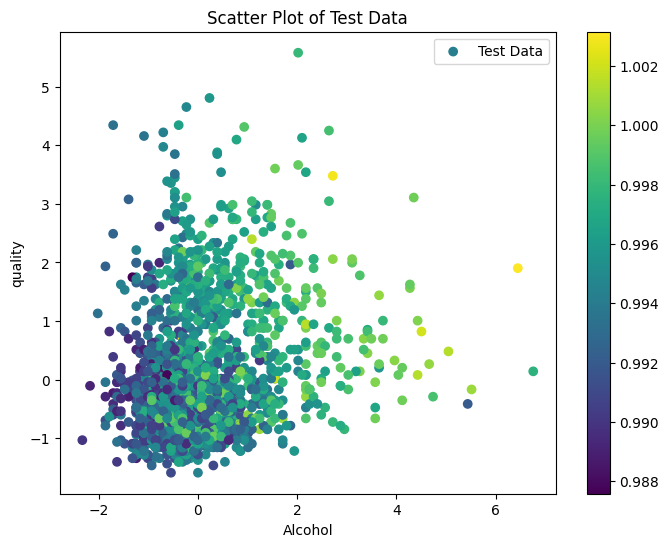

In [ ]:
# Exploration Data Analysis
import matplotlib.pyplot as plt

# Membuat plot scatter untuk X_train
plt.figure(figsize=(8, 6))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='viridis', label='Train Data')
plt.colorbar()
plt.title('Scatter Plot of Train Data')
plt.xlabel('Alcohol')
plt.ylabel('quality')
plt.legend()
plt.show()

# Membuat plot scatter untuk X_test
plt.figure(figsize=(8, 6))
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='viridis', label='Test Data')
plt.colorbar()
plt.title('Scatter Plot of Test Data')
plt.xlabel('Alcohol')
plt.ylabel('quality')
plt.legend()
plt.show()

#### Ringkasan Metode
Metode Jaringan Saraf Tiruan (Artificial Neural Network, ANN) adalah upaya untuk mensimulasikan jaringan neuron yang membentuk otak manusia sehingga komputer dapat mempelajari berbagai hal dan membuat keputusan dengan cara yang mirip manusia. ANN dibuat dengan memprogram komputer biasa untuk berperilaku seolah-olah mereka sel-sel otak yang saling berhubungan. Jaringan saraf tiruan menggunakan berbagai lapisan pemrosesan matematika untuk memahami informasi yang diberikannya. Biasanya, ANN memiliki puluhan hingga jutaan neuron tiruan disebut unit yang tersusun dalam serangkaian lapisan.
Dalam konteks analisis ini, metode ANN digunakan untuk membangun model prediksi data anggur “Vinho Verde”. Berikut adalah ringkasan metode yang digunakan dalam analisis ini dengan menggunakan model jaringan saraf tiruan (ANN):

1. Pembangunan Model: Sebuah model ANN dibangun dengan tiga lapisan - lapisan
masukan, lapisan tersembunyi, dan lapisan keluaran.

2. Fungsi Aktivasi: Fungsi aktivasi sigmoid digunakan di setiap lapisan untuk mengubah input yang berkelanjutan menjadi output antara 0 dan 1.

3. Pembagian Data: Data anggur “Vinho Verde” dibagi menjadi data pelatihan dan data uji dengan rasio 70:30.

4. Pelatihan Model: Model dilatih menggunakan data pelatihan dan kemudian dievaluasi menggunakan data uji.

5. Evaluasi Model: Metrik akurasi dan loss digunakan untuk mengevaluasi kinerja model. Akurasi adalah persentase prediksi yang benar dari total prediksi, sedangkan loss adalah ukuran seberapa jauh prediksi model dari nilai sebenarnya.

6. Hasil: Model menunjukkan tingkat akurasi yang sangat baik pada data pelatihan dan data uji, menunjukkan bahwa model mampu mempelajari pola dalam data dan membuat prediksi yang akurat.


Dengan demikian, metode ini efektif dalam memprediksi data anggur “Vinho Verde” menggunakan model ANN.


In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

# Define the model architecture
model1 = Sequential()
model2 = Sequential()
model3 = Sequential()

# model 1
model1.add(Dense(3, activation='relu'))
model1.add(Dense(32, activation='relu'))
model1.add(Dense(1, activation='linear'))

# model 2
model2.add(Dense(3, activation='relu'))
model2.add(Dense(128, activation='relu'))
model2.add(Dense(1, activation='linear'))

# model 3
model3.add(Dense(3, activation='relu'))
model3.add(Dense(256, activation='relu'))
model3.add(Dense(1, activation='linear'))


In [ ]:
model1.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])
# Mengompilasi model dengan fungsi kerugian binary cross-entropy, pengoptimal Adam, dan metrik akurasi

history1 = model1.fit(X_train, y_train, epochs=20, batch_size=1, verbose=1)
# Melatih model dengan data pelatihan, menggunakan 20 epoch dan ukuran batch 1, dengan tampilan verbose 1

# Langkah-langkah ini mengompilasi model dengan fungsi kerugian dan pengoptimal yang sesuai,
# dan melatih model menggunakan data pelatihan. Proses pelatihan akan mengevaluasi kinerja model pada setiap epoch,
# dengan tampilan progres yang ditentukan oleh verbose=1. Pelatihan model ini penting untuk menyesuaikan
# parameter model agar sesuai dengan data pelatihan.

Epoch 1/20
4547/4547 [==============================] - 9s 2ms/step - loss: 0.0177 - mean_squared_error: 0.0177
Epoch 2/20
4547/4547 [==============================] - 8s 2ms/step - loss: 2.8193e-04 - mean_squared_error: 2.8193e-04
Epoch 3/20
4547/4547 [==============================] - 9s 2ms/step - loss: 1.7605e-04 - mean_squared_error: 1.7605e-04
Epoch 4/20
4547/4547 [==============================] - 7s 2ms/step - loss: 3.9530e-05 - mean_squared_error: 3.9530e-05
Epoch 5/20
4547/4547 [==============================] - 9s 2ms/step - loss: 3.7296e-05 - mean_squared_error: 3.7296e-05
Epoch 6/20
4547/4547 [==============================] - 8s 2ms/step - loss: 1.9718e-05 - mean_squared_error: 1.9718e-05
Epoch 7/20
4547/4547 [==============================] - 9s 2ms/step - loss: 1.7490e-05 - mean_squared_error: 1.7490e-05
Epoch 8/20
4547/4547 [==============================] - 8s 2ms/step - loss: 1.8575e-05 - mean_squared_error: 1.8575e-05
Epoch 9/20
4547/4547 [==========================

In [ ]:
model2.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])
# Mengompilasi model dengan fungsi kerugian binary cross-entropy, pengoptimal Adam, dan metrik akurasi

history2 = model2.fit(X_train, y_train, epochs=20, batch_size=1, verbose=1)
# Melatih model dengan data pelatihan, menggunakan 20 epoch dan ukuran batch 1, dengan tampilan verbose 1

# Langkah-langkah ini mengompilasi model dengan fungsi kerugian dan pengoptimal yang sesuai,
# dan melatih model menggunakan data pelatihan. Proses pelatihan akan mengevaluasi kinerja model pada setiap epoch,
# dengan tampilan progres yang ditentukan oleh verbose=1. Pelatihan model ini penting untuk menyesuaikan
# parameter model agar sesuai dengan data pelatihan.

Epoch 1/20
4547/4547 [==============================] - 6s 1ms/step - loss: 0.0083 - mean_squared_error: 0.0083
Epoch 2/20
4547/4547 [==============================] - 6s 1ms/step - loss: 3.1414e-04 - mean_squared_error: 3.1414e-04
Epoch 3/20
4547/4547 [==============================] - 5s 1ms/step - loss: 6.5146e-05 - mean_squared_error: 6.5146e-05
Epoch 4/20
4547/4547 [==============================] - 6s 1ms/step - loss: 2.8783e-05 - mean_squared_error: 2.8783e-05
Epoch 5/20
4547/4547 [==============================] - 5s 1ms/step - loss: 2.4848e-05 - mean_squared_error: 2.4848e-05
Epoch 6/20
4547/4547 [==============================] - 5s 1ms/step - loss: 2.4506e-05 - mean_squared_error: 2.4506e-05
Epoch 7/20
4547/4547 [==============================] - 6s 1ms/step - loss: 2.4277e-05 - mean_squared_error: 2.4277e-05
Epoch 8/20
4547/4547 [==============================] - 5s 1ms/step - loss: 2.2975e-05 - mean_squared_error: 2.2975e-05
Epoch 9/20
4547/4547 [==========================

In [ ]:
model3.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])
# Mengompilasi model dengan fungsi kerugian binary cross-entropy, pengoptimal Adam, dan metrik akurasi

history3 = model3.fit(X_train, y_train, epochs=20, batch_size=1, verbose=1)
# Melatih model dengan data pelatihan, menggunakan 20 epoch dan ukuran batch 1, dengan tampilan verbose 1

# Langkah-langkah ini mengompilasi model dengan fungsi kerugian dan pengoptimal yang sesuai,
# dan melatih model menggunakan data pelatihan. Proses pelatihan akan mengevaluasi kinerja model pada setiap epoch,
# dengan tampilan progres yang ditentukan oleh verbose=1. Pelatihan model ini penting untuk menyesuaikan
# parameter model agar sesuai dengan data pelatihan.

Epoch 1/20
4547/4547 [==============================] - 6s 1ms/step - loss: 0.0088 - mean_squared_error: 0.0088
Epoch 2/20
4547/4547 [==============================] - 5s 1ms/step - loss: 6.0650e-04 - mean_squared_error: 6.0650e-04
Epoch 3/20
4547/4547 [==============================] - 6s 1ms/step - loss: 1.1244e-04 - mean_squared_error: 1.1244e-04
Epoch 4/20
4547/4547 [==============================] - 5s 1ms/step - loss: 3.3975e-05 - mean_squared_error: 3.3975e-05
Epoch 5/20
4547/4547 [==============================] - 5s 1ms/step - loss: 2.8006e-05 - mean_squared_error: 2.8006e-05
Epoch 6/20
4547/4547 [==============================] - 6s 1ms/step - loss: 2.7640e-05 - mean_squared_error: 2.7640e-05
Epoch 7/20
4547/4547 [==============================] - 5s 1ms/step - loss: 2.6945e-05 - mean_squared_error: 2.6945e-05
Epoch 8/20
4547/4547 [==============================] - 6s 1ms/step - loss: 2.5010e-05 - mean_squared_error: 2.5010e-05
Epoch 9/20
4547/4547 [==========================

In [ ]:
y_pred1 = model1.predict(X_test)
# Membuat prediksi berdasarkan data uji menggunakan model yang telah dilatih, kemudian hasilnya dibulatkan
y_pred1[0:10]
# Menampilkan 10 prediksi pertama dari data uji setelah proses pembulatan

# Data prediksi yang ditampilkan merupakan label klasifikasi biner yang dihasilkan oleh model untuk
# 10 sampel pertama dari data uji setelah proses pembulatan. Data prediksi ini mewakili klasifikasi dari setiap sampel,
# di mana nilai 0 menunjukkan anggur putih dan nilai 1 menunjukkan anggur merah berdasarkan prediksi model.

61/61 [==============================] - 0s 2ms/step


array([[0.99409735],
       [0.99409735],
       [0.99409735],
       [0.99409735],
       [0.99409735],
       [0.99409735],
       [0.99409735],
       [0.99409735],
       [0.99409735],
       [0.99409735]], dtype=float32)

In [ ]:
y_pred2 = model2.predict(X_test)
y_pred2[0:10]

61/61 [==============================] - 0s 1ms/step


array([[0.99159414],
       [0.99159414],
       [0.99159414],
       [0.99159414],
       [0.99159414],
       [0.99159414],
       [0.99159414],
       [0.99159414],
       [0.99159414],
       [0.99159414]], dtype=float32)

In [ ]:
y_pred3 = model3.predict(X_test)
y_pred3[0:10]

61/61 [==============================] - 0s 1ms/step


array([[0.9918906],
       [0.9918906],
       [0.9918906],
       [0.9918906],
       [0.9918906],
       [0.9918906],
       [0.9918906],
       [0.9918906],
       [0.9918906],
       [0.9918906]], dtype=float32)

61/61 [==============================] - 0s 1ms/step


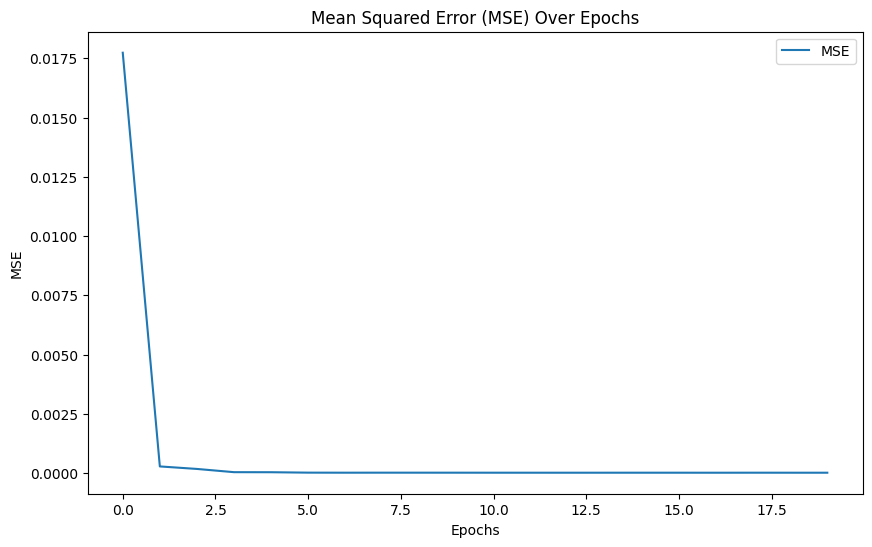

Mean Squared Error (MSE): 0.00100%


In [ ]:
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Calculate predictions
y_pred1 = model1.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred1)


# Plot MSE
plt.figure(figsize=(10, 6))
plt.plot(history1.history['loss'], label='MSE')
plt.title('Mean Squared Error (MSE) Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()
plt.show()

print(f"Mean Squared Error (MSE): {mse:.5%}")



61/61 [==============================] - 0s 917us/step


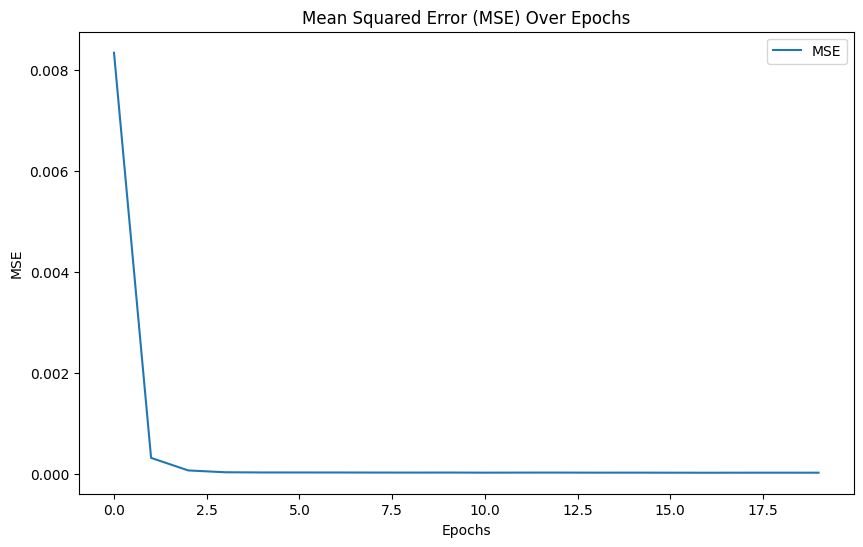

Mean Squared Error (MSE): 0.00187%


In [ ]:
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Calculate predictions
y_pred2 = model2.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred2)


# Plot MSE
plt.figure(figsize=(10, 6))
plt.plot(history2.history['loss'], label='MSE')
plt.title('Mean Squared Error (MSE) Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()
plt.show()

print(f"Mean Squared Error (MSE): {mse:.5%}")



61/61 [==============================] - 0s 942us/step


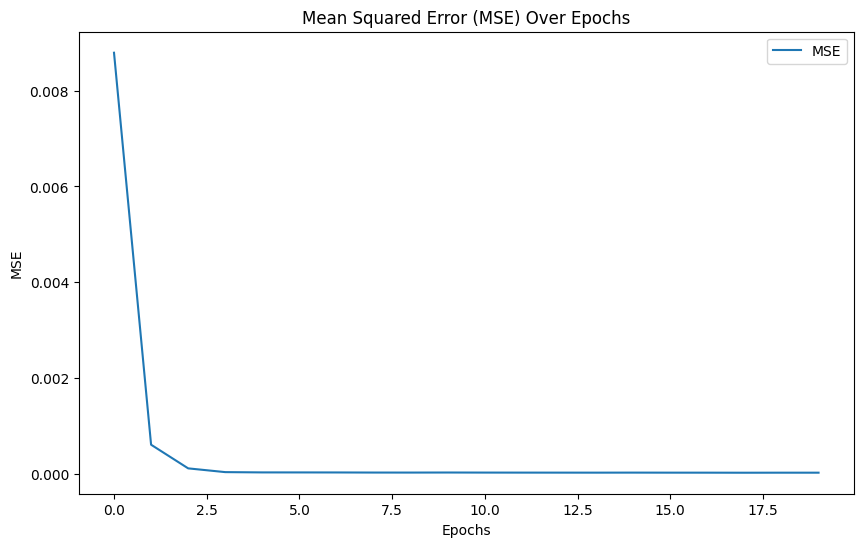

Mean Squared Error (MSE): 0.00169%


In [ ]:
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Calculate predictions
y_pred3 = model3.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred3)


# Plot MSE
plt.figure(figsize=(10, 6))
plt.plot(history3.history['loss'], label='MSE')
plt.title('Mean Squared Error (MSE) Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()
plt.show()

print(f"Mean Squared Error (MSE): {mse:.5%}")



In [ ]:
print(history1.history)  # Mencetak riwayat pelatihan model, termasuk metrik-metrik yang dipantau selama pelatihan

{'loss': [0.014838063158094883, 0.00018739045481197536, 0.00011743915092665702, 2.4947354177129455e-05, 1.965925912372768e-05, 1.636488377698697e-05, 1.2091354619769845e-05, 1.015902580547845e-05, 9.801383384910878e-06, 9.321735888079274e-06, 9.515978490526322e-06, 8.99430233403109e-06, 9.43508894124534e-06, 9.615094313630834e-06, 9.617520845495164e-06, 8.754785994824488e-06, 9.518738806946203e-06, 8.911947588785551e-06, 9.199294254358392e-06, 9.29090765566798e-06], 'mean_squared_error': [0.014838063158094883, 0.00018739045481197536, 0.00011743915092665702, 2.4947354177129455e-05, 1.965925912372768e-05, 1.636488377698697e-05, 1.2091354619769845e-05, 1.015902580547845e-05, 9.801383384910878e-06, 9.321735888079274e-06, 9.515978490526322e-06, 8.99430233403109e-06, 9.43508894124534e-06, 9.615094313630834e-06, 9.617520845495164e-06, 8.754785994824488e-06, 9.518738806946203e-06, 8.911947588785551e-06, 9.199294254358392e-06, 9.29090765566798e-06]}


In [ ]:
print(history2.history)  # Mencetak riwayat pelatihan model, termasuk metrik-metrik yang dipantau selama pelatihan

{'loss': [0.008349201641976833, 0.0003141402848996222, 6.514613050967455e-05, 2.878298982977867e-05, 2.4848386601661332e-05, 2.450556894473266e-05, 2.4277302145492285e-05, 2.297469472978264e-05, 2.2229640308069065e-05, 2.316440259164665e-05, 2.084111110889353e-05, 2.2124248062027618e-05, 2.2423741029342636e-05, 2.0847492123721167e-05, 2.1280497094267048e-05, 2.024367859121412e-05, 1.9636312572401948e-05, 2.0276978830224834e-05, 2.0453764591366053e-05, 1.9994085960206576e-05], 'mean_squared_error': [0.008349201641976833, 0.0003141402848996222, 6.514613050967455e-05, 2.878298982977867e-05, 2.4848386601661332e-05, 2.450556894473266e-05, 2.4277302145492285e-05, 2.297469472978264e-05, 2.2229640308069065e-05, 2.316440259164665e-05, 2.084111110889353e-05, 2.2124248062027618e-05, 2.2423741029342636e-05, 2.0847492123721167e-05, 2.1280497094267048e-05, 2.024367859121412e-05, 1.9636312572401948e-05, 2.0276978830224834e-05, 2.0453764591366053e-05, 1.9994085960206576e-05]}


In [ ]:
print(history3.history)  # Mencetak riwayat pelatihan model, termasuk metrik-metrik yang dipantau selama pelatihan

{'loss': [0.008792786858975887, 0.0006064967601560056, 0.00011244222696404904, 3.397503314772621e-05, 2.80056192423217e-05, 2.7639945983537473e-05, 2.6945244826492853e-05, 2.501009112165775e-05, 2.460873656673357e-05, 2.57999163295608e-05, 2.4423745344392955e-05, 2.3783826691214927e-05, 2.335179851797875e-05, 2.294705882377457e-05, 2.3773041903041303e-05, 2.2907499442226253e-05, 2.254434184578713e-05, 2.146982296835631e-05, 2.2324840756482445e-05, 2.2310696294880472e-05], 'mean_squared_error': [0.008792786858975887, 0.0006064967601560056, 0.00011244222696404904, 3.397503314772621e-05, 2.80056192423217e-05, 2.7639945983537473e-05, 2.6945244826492853e-05, 2.501009112165775e-05, 2.460873656673357e-05, 2.57999163295608e-05, 2.4423745344392955e-05, 2.3783826691214927e-05, 2.335179851797875e-05, 2.294705882377457e-05, 2.3773041903041303e-05, 2.2907499442226253e-05, 2.254434184578713e-05, 2.146982296835631e-05, 2.2324840756482445e-05, 2.2310696294880472e-05]}


#### Hasil dan Analisis
Berdasarkan pelatihan model, hasil menunjukkan bahwa model memiliki kinerja yang sangat baik. MSE yang dihasilkan bisa mencapai 0.00100 untuk 20 epoch serta di tiap tiap epoch nya mengalami penurunan MSE yang signifikan dimulai dari epoch pertama berkisar di nilai 0.01 sampai ke 0.001, menunjukkan peningkatan kemampuan model dalam meminimalkan kesalahan prediksi. Data ini merupakan data dengan model yang memiliki perceptron terendah yaitu 32 serta menggunakan fungsi aktivasi relu di input layer dan hidden layer serta linear di output layer karena output yang diinginkan merupakan regresi.

Dengan demikian, model yang telah dibangun mampu menghitung density anggur dengan akurasi yang tinggi, menunjukkan kemampuan yang baik dalam memahami pola-pola yang terdapat dalam data fisikokimia anggur "Vinho Verde". Namun, perlu diingat bahwa evaluasi model pada data validasi atau data uji tambahan juga penting untuk memastikan bahwa model dapat secara efektif mengeneralisasi dan mempertahankan kinerja yang baik pada data yang tidak terlihat sebelumnya.

#### Kesimpulan
Berdasarkan analisis yang telah dilakukan, model jaringan saraf tiruan (ANN) yang telah dibangun menunjukkan kinerja yang sangat baik dalam menghitung density anggur “Vinho Verde”. MSE yang kecil pada data pelatihan dan uji menunjukkan bahwa model ini mampu mempelajari dan memahami pola dalam data dengan efektif.

Namun, meskipun model menunjukkan kinerja yang kuat, masih ada ruang untuk peningkatan. Misalnya, tidak semua variabel input mungkin relevan, sehingga bisa menarik untuk menguji metode pemilihan fitur, memperbanyak epoch juga dapat mempengaruhi hasil akhir menjadi lebih baik. Secara keseluruhan, hasil analisis ini menunjukkan bahwa model ANN dapat menjadi alat yang efektif untuk mengklasifikasikan anggur “Vinho Verde” berdasarkan fitur fisikokimia.
